# Relax Challenge

Adopted user: user who has logged onto the product on three separate days in at least one seven-day period

Identify which factors predict future user adoption

#### Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users = pd.read_csv('./takehome_users.csv', encoding = 'latin1')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement = pd.read_csv('./takehome_user_engagement.csv', encoding = 'latin1')

In [5]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


#### Data Cleaning

In [6]:
# Rename column for clarity/consistency
users.rename(columns = {'object_id':'user_id'}, inplace = True)

In [7]:
users.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [8]:
user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [9]:
user_engagement['visited'].unique()

array([1], dtype=int64)

In [10]:
# Convert to datetime
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [11]:
# Check out date ranges of data

In [12]:
user_engagement['time_stamp'].max()

Timestamp('2014-06-06 14:58:50')

In [13]:
user_engagement['time_stamp'].min()

Timestamp('2012-05-31 08:20:06')

Figure out engagement per week factoring into adoption

In [14]:
user_engagement.set_index('time_stamp', inplace = True)

In [15]:
df = user_engagement.groupby('user_id').resample('W')['visited'].sum().to_frame(name = 'weekly_visits')

In [16]:
df.head()

weekly_visits
user_id time_stamp               
1       2014-04-27              1
2       2013-11-17              1
        2013-11-24              0
        2013-12-01              1
        2013-12-08              0

In [17]:
# Create new column dictating if user was adopted
df['adopted'] = (df['weekly_visits'] >= 3).astype(int)

In [18]:
df.head()

weekly_visits  adopted
user_id time_stamp                        
1       2014-04-27              1        0
2       2013-11-17              1        0
        2013-11-24              0        0
        2013-12-01              1        0
        2013-12-08              0        0

In [19]:
df = df.reset_index()

In [20]:
# Consolidate into DataFrame of user id and whether the user was adopted; cut out time stamps and other unneeded info
df = df.groupby('user_id')['adopted'].sum().to_frame(name = 'adopted')

In [21]:
df.head()

,adopted
user_id,
1,0
2,1
3,0
4,0
5,0


In [22]:
users = users.merge(df, on = 'user_id')

In [30]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


#### Data Insights

Prepare for heatmap; values must be numerical

In [23]:
users.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int32
dtype: object

In [24]:
heatmap = users.drop(['creation_time', 'name', 'email', 'last_session_creation_time'], axis = 1)

In [25]:
heatmap.dtypes

user_id                         int64
creation_source                object
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int32
dtype: object

In [26]:
# One-hot encode creation source to see if there's any correlation
heatmap = pd.get_dummies(heatmap, columns = ['creation_source'], drop_first = True)

In [27]:
heatmap.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,0,False,False,False,False
1,2,0,0,1,316.0,1,True,False,False,False
2,3,0,0,94,1525.0,0,True,False,False,False
3,4,0,0,1,5151.0,0,False,False,False,False
4,5,0,0,193,5240.0,0,False,False,False,False


<Axes: >

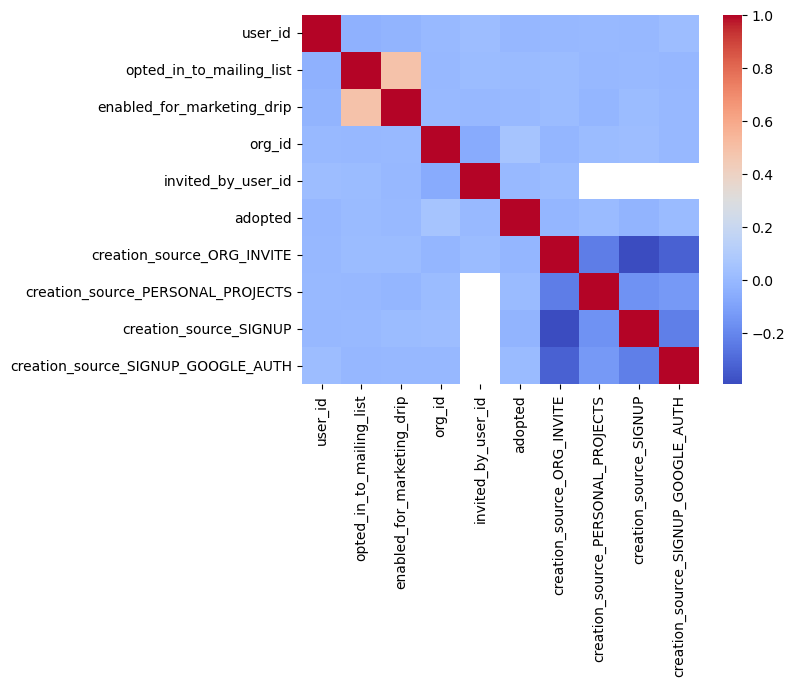

In [28]:
sns.heatmap(heatmap.corr(), cmap = 'coolwarm')

#### Answer

Little to no correlation between adoption and factors listed; recommended to collect additional data on user experience, specific features of the product interacted with, and feedback of those who did not adopt the product